<a href="https://colab.research.google.com/github/Celestiq/dino-gesture/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import tensorflow_hub as hub
from glob import glob
import zipfile

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
zip = zipfile.ZipFile('/content/drive/MyDrive/Breast_Cancer.zip')
zip.extractall('/content/data')
zip.close()

In [4]:
data = glob('/content/data/**/*.png', recursive=True)

images = []
labels = []

for i in data[:30000]:
    if i.endswith('.png'):
        labels.append(i[-5])
        img = cv2.imread(i)
        img = cv2.resize(img, (100,100))
        images.append(img)

In [5]:
from tensorflow.keras.utils import to_categorical
import numpy as np

x = np.stack(images)
y = to_categorical(labels)

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)

In [7]:
model_0 = Sequential([
                      tf.keras.layers.InputLayer((100,100,3), name="input_layer"),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(2, "sigmoid")
])

model_0.compile("Adam", tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [8]:
history_0 = model_0.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
750/750 [==============================] - 44s 20ms/step - loss: 0.7966 - accuracy: 0.8052 - val_loss: 0.3560 - val_accuracy: 0.8517
Epoch 2/20
750/750 [==============================] - 15s 19ms/step - loss: 0.3398 - accuracy: 0.8559 - val_loss: 0.3187 - val_accuracy: 0.8683
Epoch 3/20
750/750 [==============================] - 15s 20ms/step - loss: 0.3347 - accuracy: 0.8582 - val_loss: 0.3484 - val_accuracy: 0.8425
Epoch 4/20
750/750 [==============================] - 15s 19ms/step - loss: 0.3381 - accuracy: 0.8547 - val_loss: 0.3500 - val_accuracy: 0.8597
Epoch 5/20
750/750 [==============================] - 14s 19ms/step - loss: 0.3247 - accuracy: 0.8614 - val_loss: 0.3097 - val_accuracy: 0.8677
Epoch 6/20
750/750 [==============================] - 14s 19ms/step - loss: 0.3164 - accuracy: 0.8664 - val_loss: 0.3320 - val_accuracy: 0.8625
Epoch 7/20
750/750 [==============================] - 14s 19ms/step - loss: 0.3088 - accuracy: 0.8700 - val_loss: 0.3298 - val_accuracy:

In [9]:
model_0.fit(x_test, y_test)

188/188 [==============================] - 4s 19ms/step - loss: 0.3371 - accuracy: 0.8555


###Let us write a function to evaluate our model's training curves.

In [10]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("Loss")
    plt.xlabel("No. of Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("No. of Epochs")
    plt.legend();

Now let us analyse the performance of our baseline model with the help of loss curves.

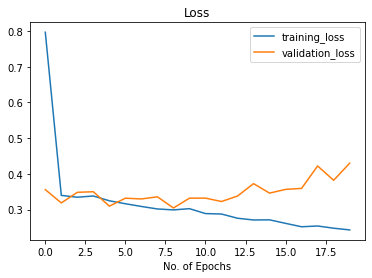

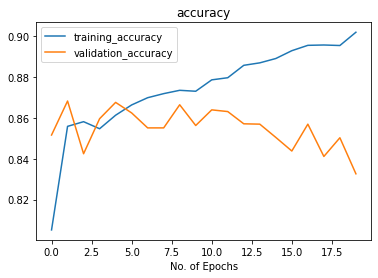

In [11]:
plot_loss_curves(history_0)

Though our training accuracy is increasing, but validation accuracy is decreasing thus creating huge a gap between both the curves towards the end. These could be the sign that our model is overfitting.
To address this issue, let us create a new model with a few tweaks and let us see if we can build a model with better accuracy.

In [12]:
model_1 = Sequential([
                      tf.keras.layers.InputLayer((100,100,3), name="input_layer"),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(2, "sigmoid")
])

model_1.compile("Adam", tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [13]:
history_1 = model_1.fit(x_train, y_train, epochs=13, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/13
750/750 [==============================] - 16s 20ms/step - loss: 0.7469 - accuracy: 0.7240 - val_loss: 0.4223 - val_accuracy: 0.8243
Epoch 2/13
750/750 [==============================] - 15s 20ms/step - loss: 0.4251 - accuracy: 0.8073 - val_loss: 0.3801 - val_accuracy: 0.8330
Epoch 3/13
750/750 [==============================] - 15s 20ms/step - loss: 0.3826 - accuracy: 0.8315 - val_loss: 0.4038 - val_accuracy: 0.8282
Epoch 4/13
750/750 [==============================] - 15s 20ms/step - loss: 0.3765 - accuracy: 0.8389 - val_loss: 0.3565 - val_accuracy: 0.8478
Epoch 5/13
750/750 [==============================] - 15s 20ms/step - loss: 0.3543 - accuracy: 0.8478 - val_loss: 0.3678 - val_accuracy: 0.8403
Epoch 6/13
750/750 [==============================] - 15s 20ms/step - loss: 0.3405 - accuracy: 0.8543 - val_loss: 0.3123 - val_accuracy: 0.8690
Epoch 7/13
750/750 [==============================] - 15s 20ms/step - loss: 0.3318 - accuracy: 0.8587 - val_loss: 0.3854 - val_accuracy:

In [14]:
model_1.evaluate(x_test, y_test)

188/188 [==============================] - 2s 10ms/step - loss: 0.3090 - accuracy: 0.8712


[0.30898621678352356, 0.8711666464805603]

I added a few more layers and reduced the number of epochs to 15 and this seems to have worked because now we have bettered our accuracy from 85.55% to 87.11%.
Let us now plot the loss curves.

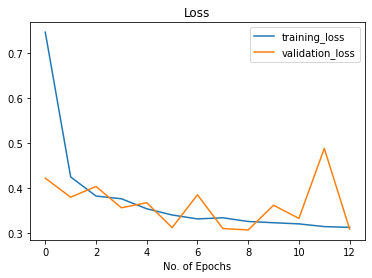

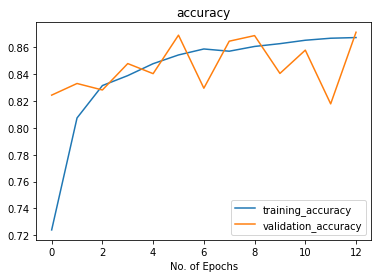

In [15]:
plot_loss_curves(history_1)

These are some better looking loss curves. The accuracy is increasing steadily and it seems as if we have solved the problem of overfitting.

In [16]:
model_1.save('/content/drive/MyDrive/Colab Notebooks')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/assets


Now that our model has performed fairly well, let us test it and see for ourselves how it would perform on some random images.

In [19]:
check_images=[]
check_labels=[]

for i in data[30000:35000]:
    check_labels.append(i[-5])
    img = cv2.imread(i)
    img = cv2.resize(img, (100,100))
    check_images.append(img)

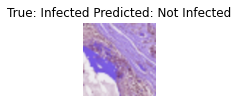

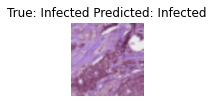

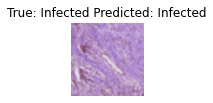

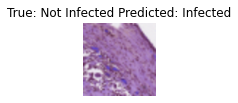

In [107]:
import random
import os

class_names = ["Not Infected", "Infected"]

for i in range(4):
    ax = plt.subplot(1,4,i+1)
    rand_index = random.choice(range(len(check_images)))
    pred = model_1.predict(tf.expand_dims(check_images[rand_index], axis=0))
    plt.imshow(check_images[rand_index])
    plt.title(f"True: {class_names[int(check_labels[rand_index])]} Predicted: {class_names[pred.argmax()]}")
    plt.axis(False)
    plt.show()

Let us plot a confusion matrix for our predictions.

In [65]:
y_preds = []
for i in range(len(check_images)):
    y_preds.append(model_1.predict(tf.expand_dims(check_images[i], axis=0)))

In [74]:
y_preds = np.array(y_preds)

In [88]:
y_preds_bin = []
for i in y_preds:
    y_preds_bin.append(int(i.argmax(axis=1)))

In [97]:
check_labels_int = []

for i in range(len(check_labels)):
    check_labels_int.append(int(check_labels[i]))

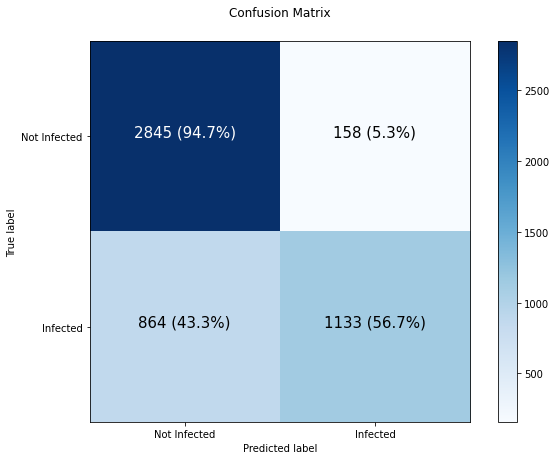

In [104]:
import itertools
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(check_labels_int, y_preds_bin)
matrix_norm = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
n_classes = matrix.shape[0]

fig, ax = plt.subplots(figsize=(10,7))
mat_ax = ax.matshow(matrix, cmap=plt.cm.Blues)
fig.colorbar(mat_ax)

labels = class_names

ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

threshold = (matrix.max() + matrix.min()) / 2.

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, f"{matrix[i, j]} ({matrix_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if matrix[i, j] > threshold else "black",
             size=15)